In [61]:
import numpy as np
import matplotlib.pyplot as plt
from Functions import *
from Newtonsys import Newtonsys
import time

In [5]:
def FdF20_1(x):
    F1 = [1, 1, 1]
    F2 = [2*x[0], 2*x[1], 2*x[2]]
    F3 = [x[1] + x[2], x[0], x[0]]
    dF = np.array([F1, F2, F3])
    F = np.array([x[0] + x[1] + x[2], x[0]**2 + x[1]**2 + x[2]**2 - 2, x[0]*x[1] + x[0]*x[2] + 1])
    return F, dF

In [6]:
FdF20_1(np.array([1,2,3]))

(array([ 6, 12,  6]),
 array([[1, 1, 1],
        [2, 4, 6],
        [5, 1, 1]]))

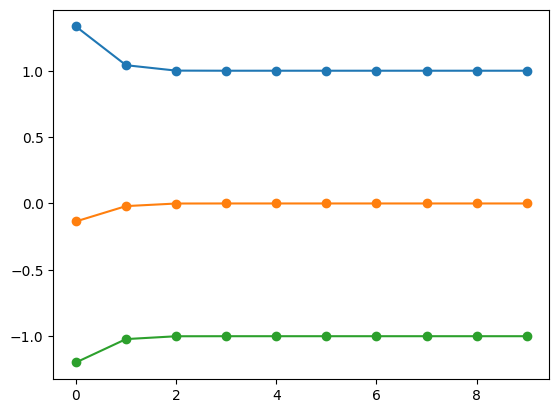

In [14]:
X0 = np.array([3/4, 1/2, -1/2])
Xiter = Newtonsys(FdF20_1, X0, 10)
plt.plot(Xiter,'o-');

In [15]:
X0 = np.array([3/4, 1/2, 1/2])
Xiter = Newtonsys(FdF20_1, X0, 1)

LinAlgError: Singular matrix

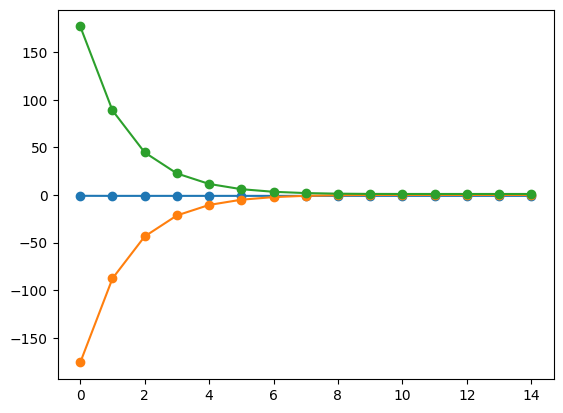

In [17]:
X0 = np.array([3/4, 1/2, 1/2+0.01])
Xiter = Newtonsys(FdF20_1, X0, 15)
plt.plot(Xiter,'o-');

In [30]:
e = np.abs(np.ones([15,3])*np.array([-1,0,1])-Xiter)

In [34]:
np.where(np.max(e,axis=1) < 1e-6)

(array([12, 13, 14], dtype=int64),)

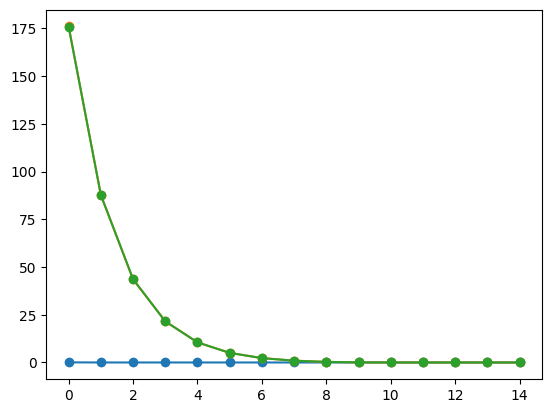

In [35]:
plt.plot(e,'o-');

21.1

In [39]:
A = np.array([[3,12,10],[12,0,20],[0,2,30]])
b = np.array([72.3,99.5,56.6])
x = np.linalg.solve(A,b)
print(x)

[5.50904762 3.25642857 1.66957143]


In [41]:
bny = np.array([73.3,98.4,57.1])
xny = np.linalg.solve(A,bny)
print(xny)

[5.40095238 3.35857143 1.67942857]


In [42]:
np.abs(x-xny)

array([0.10809524, 0.10214286, 0.00985714])

In [66]:
def solve1(n):
    A = np.random.rand(n,n)/5
    b = np.random.rand(n)
    start = time.time()
    np.linalg.solve(A,b)
    end = time.time()
    return end-start


In [67]:
def solve2(n):
    A = np.random.rand(n,n)/5
    b = np.random.rand(n)
    start = time.time()
    np.dot(np.linalg.inv(A),b)
    end = time.time()
    return end-start

In [68]:
def solve3(n):
    A = np.random.rand(n,n)/5
    A_copy = A.copy()
    b = np.random.rand(n)
    start = time.time()
    for i in range(n):
        A_copy[:,i] = b
        np.linalg.det(A_copy)/np.linalg.det(A)
        A_copy = A.copy()
    end = time.time()
    return end-start

In [71]:
for i in range(1,801,100):
    print(i, solve1(i), solve2(i), solve3(i))


1 0.0 0.0 0.0
101 0.18053269386291504 0.05683302879333496 0.18949365615844727
201 0.001994609832763672 0.003988504409790039 1.8620214462280273
301 0.01296544075012207 0.0029916763305664062 2.117223024368286
401 0.003988981246948242 0.008976221084594727 4.081162452697754
501 0.014960050582885742 0.006981372833251953 7.312751054763794
601 0.005984306335449219 0.009973287582397461 11.166370391845703
701 0.0069811344146728516 0.03191494941711426 15.991239547729492


In [74]:
result = [solve1(800), solve2(800), solve3(800)]

In [75]:
result

[0.20943498611450195, 0.01894998550415039, 21.741798877716064]

In [77]:
result[2]/result[0]

103.81168534004831